# CNN Model for Facical Recognition 

In [7]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
# Importing Deep Learning Libraries
from tensorflow.keras.utils import load_img, img_to_array
#from keras.preprocessing.image import load_img, 
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

## Displaying the Images

In [3]:
picture_size = 48
folder_path = "../CNN2/data/"


In [4]:
os.listdir(folder_path+"train/")

['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise']

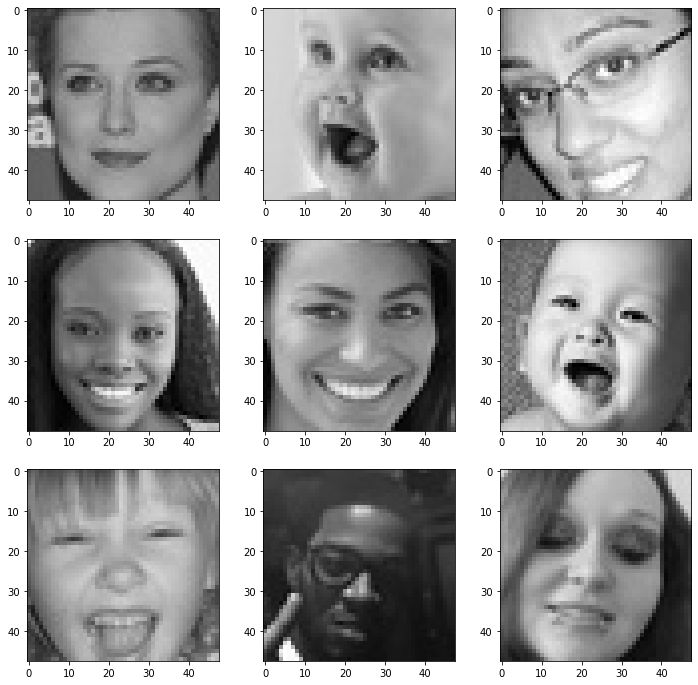

In [5]:
expression = 'Happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()


## Making Training and Validation Data

In [6]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)



test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)


Found 27251 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


## Model Building

In [9]:
from keras.optimizers import Adam,SGD,RMSprop

no_of_classes = 6

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
 
model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

## Fitting the Model with Training and Validation Data

In [10]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 10

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [11]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/10
212/212 [==============================] - 822s 4s/step - loss: 1.7395 - accuracy: 0.3073 - val_loss: 1.9989 - val_accuracy: 0.3116 - lr: 0.0010
Epoch 2/10
212/212 [==============================] - 632s 3s/step - loss: 1.4082 - accuracy: 0.4463 - val_loss: 1.5075 - val_accuracy: 0.4214 - lr: 0.0010
Epoch 3/10
212/212 [==============================] - 556s 3s/step - loss: 1.2550 - accuracy: 0.5079 - val_loss: 1.3528 - val_accuracy: 0.4773 - lr: 0.0010
Epoch 4/10
212/212 [==============================] - 595s 3s/step - loss: 1.1707 - accuracy: 0.5421 - val_loss: 1.1528 - val_accuracy: 0.5514 - lr: 0.0010
Epoch 5/10
212/212 [==============================] - 611s 3s/step - loss: 1.1048 - accuracy: 0.5682 - val_loss: 1.1611 - val_accuracy: 0.5564 - lr: 0.0010
Epoch 6/10
212/212 [==============================] - 564s 3s/step - loss: 1.0483 - accuracy: 0.5927 - val_loss: 1.1313 - val_accuracy: 0.5587 - lr: 0.0010
Epoch 7/10
212/212 [==============================] - 660s 3s/st

## Plotting Accuracy & Loss

In [18]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


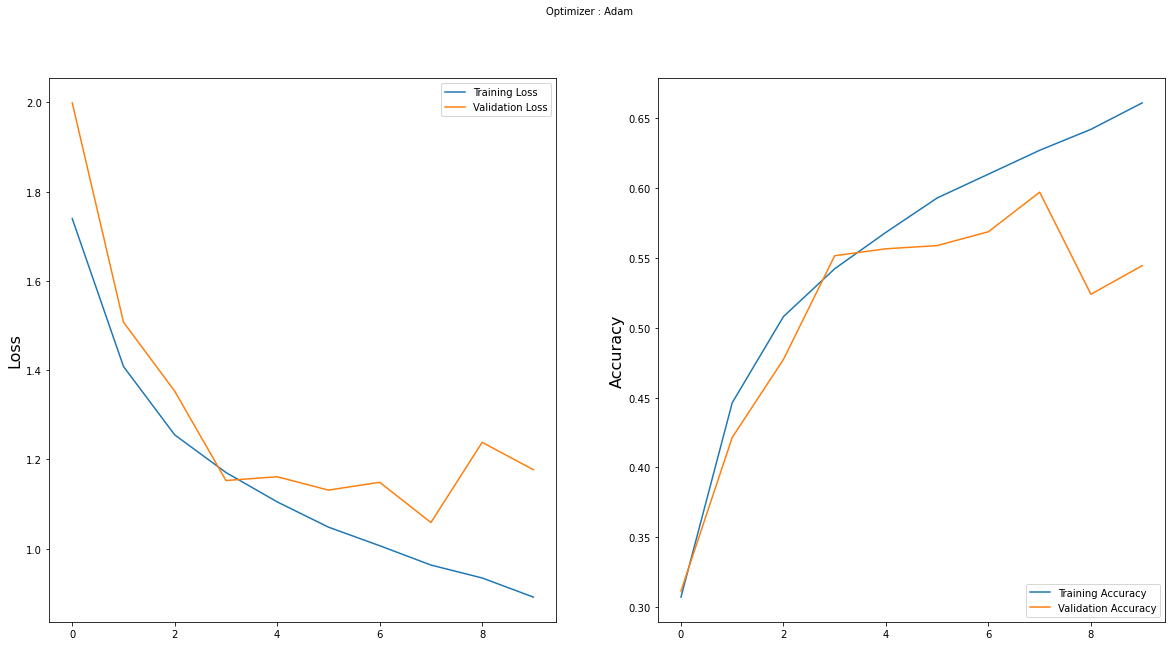

In [12]:
#plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## Sample Comparison

In [16]:
from random import randrange

## Trail: Confusion Matrix

In [13]:
from sklearn import metrics
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [14]:
#Confution Matrix and Classification Report
validation_generator=test_set
num_of_test_samples = 7067
Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

C:\Users\49176\AppData\Local\Temp\ipykernel_17448\1513858700.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)


Confusion Matrix
[[ 492   75   22  264   95   10]
 [ 134  347   16  277  188   62]
 [  83   65 1114  411   82   19]
 [  92   28   32  944  129    8]
 [ 168   73   35  493  471    7]
 [  28  199   38   59   32  475]]
Classification Report
              precision    recall  f1-score   support

       Angry       0.49      0.51      0.50       958
        Fear       0.44      0.34      0.38      1024
       Happy       0.89      0.63      0.74      1774
     Neutral       0.39      0.77      0.51      1233
         Sad       0.47      0.38      0.42      1247
     Suprise       0.82      0.57      0.67       831

    accuracy                           0.54      7067
   macro avg       0.58      0.53      0.54      7067
weighted avg       0.60      0.54      0.55      7067



In [15]:
confusionmatrix=metrics.confusion_matrix(y_pred, validation_generator.classes)

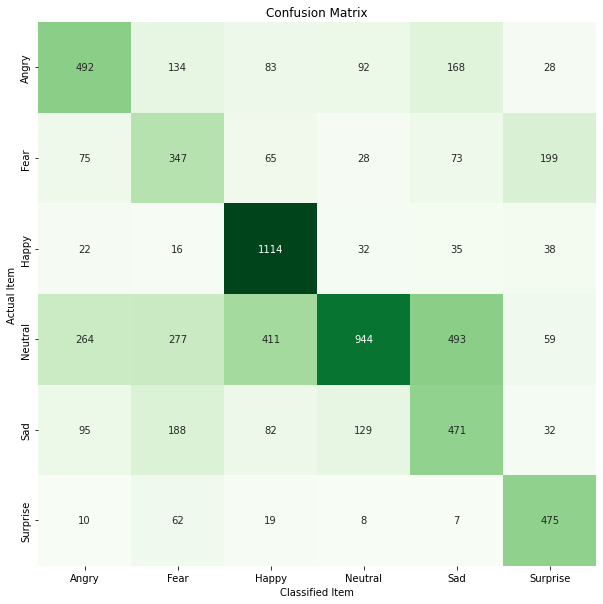

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(confusionmatrix, annot=True, fmt='d',cmap="Greens",cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual Item")
plt.xlabel("Classified Item")
plt.xticks(np.arange(6)+0.5,[ 
    "Angry",
    "Fear",
    "Happy",
    "Neutral",
    "Sad",
    "Surprise"
    
])
plt.yticks(np.arange(6)+0.5,[ 
    "Angry",
    "Fear",
    "Happy",
    "Neutral",
    "Sad",
    "Surprise"
    
])

plt.show()

In [17]:
#Mit Array lassen sich die Zahlen in die Klassen übersetzen
class_names = [
    "Angry",
    "Fear",
    "Happy",
    "Neutral",
    "Sad",
    "Surprise"
]

predict_class=np.argmax(Y_pred,axis=1) #Gives me the highest value in each array

In [24]:
Y_test = model.predict(train_set, num_of_test_samples // batch_size+1)
y_test = np.argmax(Y_test, axis=1)
np.array(class_names)[predict_class] #Translates Numbers from Predict_class into classnames
#based on the "Dictionary" class_names


213/213 [==============================] - 241s 1s/step


array(['Sad', 'Neutral', 'Neutral', ..., 'Surprise', 'Neutral',
       'Surprise'], dtype='<U8')

4
['Neutral' 'Neutral' 'Angry' ... 'Neutral' 'Neutral' 'Neutral']


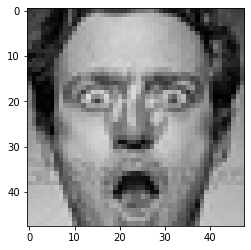

In [170]:
expressions = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise']
expression_random = randrange(6)
expression = expressions[expression_random]

random = randrange(100)

img = load_img(folder_path+"validation/"+expression+"/"+
                  os.listdir(folder_path + "validation/" + expression)[random], target_size=(picture_size, picture_size))
plt.imshow(img)


print(predict_class[random])
predict_class=np.argmax(Y_pred,axis=1)
print(np.array(class_names)[predict_class])


In [45]:
print(expressions[0])

Angry


Sad


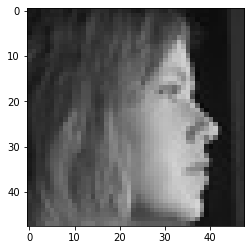

In [103]:
expressions = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise']
expression_random = randrange(6)
expression = expressions[expression_random]

random = randrange(100)

img = load_img(folder_path+"validation/"+expression+"/"+
                  os.listdir(folder_path + "validation/" + expression)[random], target_size=(picture_size, picture_size))
plt.imshow(img) 
print(expression)
    #print("The prediction for this is "+ str(class_names[y_train[random]]))

## Log Daten

In [43]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)